# Practical 9: Perceptron

In [1]:
import sys
import time

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

## 2D Inputs and single class classification

### Training

In [2]:
X = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1.]
])
y = np.array([
    [0.],
    [0.],
    [0.],
    [1.]
])

In [3]:
num_epochs  = 15
num_neurons = 1
α           = 1.

In [4]:
w = np.random.randn(num_neurons, X.shape[1])
b = np.random.randn(num_neurons, 1)

In [5]:
for _ in range(1, num_epochs+1):
    for i in range(X.shape[0]):
        z = w @ X[i][:, None] + b
        a = 1. * (z >= 0)
        ϵ = y[i] - a
        w = w + α * ϵ * X[i]
        b = b + α * ϵ
    sys.stdout.write(f"\rEpoch {_}: w = {w}, b = {b}")
    time.sleep(0.5)

Epoch 15: w = [[0.58810908 0.44563303]], b = [[-0.67525318]]

### Predicting

In [6]:
w @ [0., 0.] + b

array([[-0.67525318]])

In [7]:
w @ [1., 0.] + b

array([[-0.0871441]])

In [8]:
w @ [0., 1.] + b

array([[-0.22962016]])

In [9]:
w @ [1., 1.] + b

array([[0.35848893]])

### Plotting the hyperplane

In [10]:
x = np.linspace(0., 1., num=100)
z = np.linspace(0., 1., num=100)
x, z = np.meshgrid(x, z)

In [11]:
grid = np.concatenate((x[..., None], z[..., None]), axis=-1)[..., None]

In [12]:
y_grid = w @ grid + b

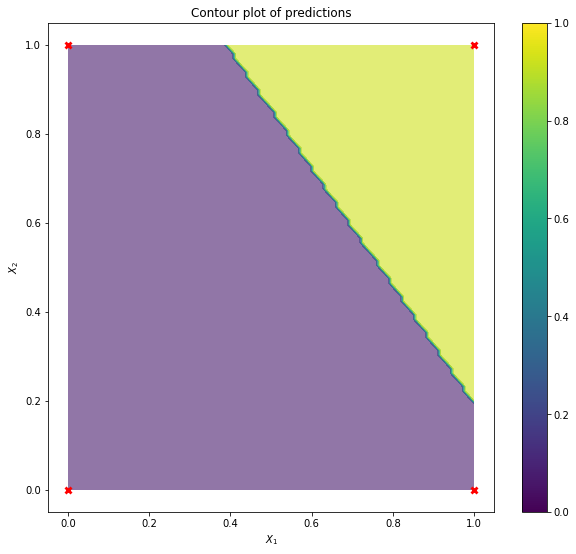

In [13]:
plt.figure(figsize=(10, 9));
plt.contourf(grid[:, :, 0, 0], grid[:, :, 1, 0], 1.*(y_grid[:, :, 0, 0]>=0), alpha=0.6);
plt.scatter(X[:, 0], X[:, 1], linewidths=2.8, color='r', marker='x');
plt.colorbar();
plt.title("Contour plot of predictions");
plt.xlabel("$X_1$");
plt.ylabel("$X_2$");
plt.xlim(0 - 0.05, 1 + 0.05);
plt.ylim(0 - 0.05, 1 + 0.05);

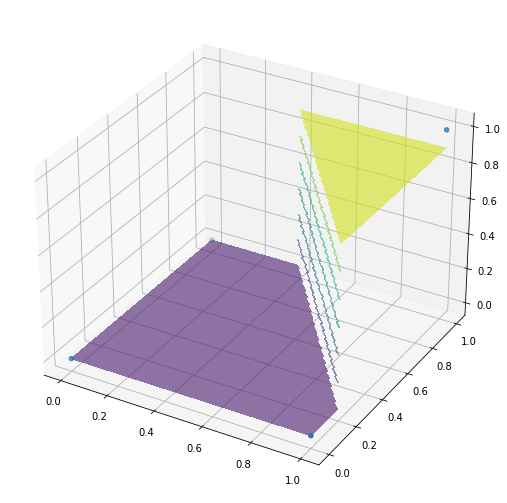

In [14]:
fig = plt.figure(figsize=(10, 9))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], y)
ax.contourf(grid[:, :, 0, 0], grid[:, :, 1, 0], 1.*(y_grid[:, :, 0, 0]>=0), alpha=0.6);

## 3D Inputs and single class classification

### Training

In [15]:
X = np.array([
    [0, 0, 0],
    [0, 1, 0],
    [1, 0, 0],
    [1, 1, 0],
    [0, 0, 1],
    [0, 1, 1],
    [1, 0, 1],
    [1, 1, 1.],
])
y = np.array([
    [0.],
    [0.],
    [0.],
    [0.],
    [0.],
    [0.],
    [0.],
    [1.]
])

In [16]:
num_epochs  = 15
num_neurons = 1
α           = 1.

In [17]:
w = np.random.randn(num_neurons, X.shape[1])
b = np.random.randn(num_neurons, 1)

In [18]:
for _ in range(1, num_epochs+1):
    for i in range(X.shape[0]):
        z = w @ X[i][:, None] + b
        a = 1. * (z >= 0)
        ϵ = y[i] - a
        w = w + α * ϵ * X[i]
        b = b + α * ϵ
    sys.stdout.write(f"\rEpoch {_}: w = {w}, b = {b}")
    time.sleep(0.5)

Epoch 15: w = [[1.14034496 0.88521678 1.955691  ]], b = [[-3.35052154]]

### Predicting

In [19]:
print((w @ X.T + b).reshape(-1, 1))

[[-3.35052154]
 [-2.46530476]
 [-2.21017658]
 [-1.3249598 ]
 [-1.39483054]
 [-0.50961376]
 [-0.25448558]
 [ 0.6307312 ]]
